In [5]:
from Helpers import *
import matplotlib.pyplot as plt
import os
# os.chdir("C:/Users/Lanceiv/Documents/GEMS/report")

In [6]:
m = 10000
SNR = 1000
TIs = [200, 300, 400, 500, 600, 700, 800, 900]

datas = []
for TI in TIs:
    data = run_metro_2(TI, m, SNR, verbose = False)
    datas.append(data)

# datas_n1 = []
# for data in datas:
#     data_n1 = data.copy()
#     for param in range(4):
#         data_n1[:,param] = normalize(data[:,param])[0]
#     datas_n1.append(data_n1)

# datas_n2 = []

# maxs = [np.max([data[:,i] for data in datas]) for i in range(4)]
# mins = [np.min([data[:,i] for data in datas]) for i in range(4)]

# for data in datas:
#     data_n2 = data.copy()
#     for param in range(4):
#         data_n2[:,param] = normalize(data[:,param], maxs[param], mins[param])[0]
#     datas_n2.append(data_n2)

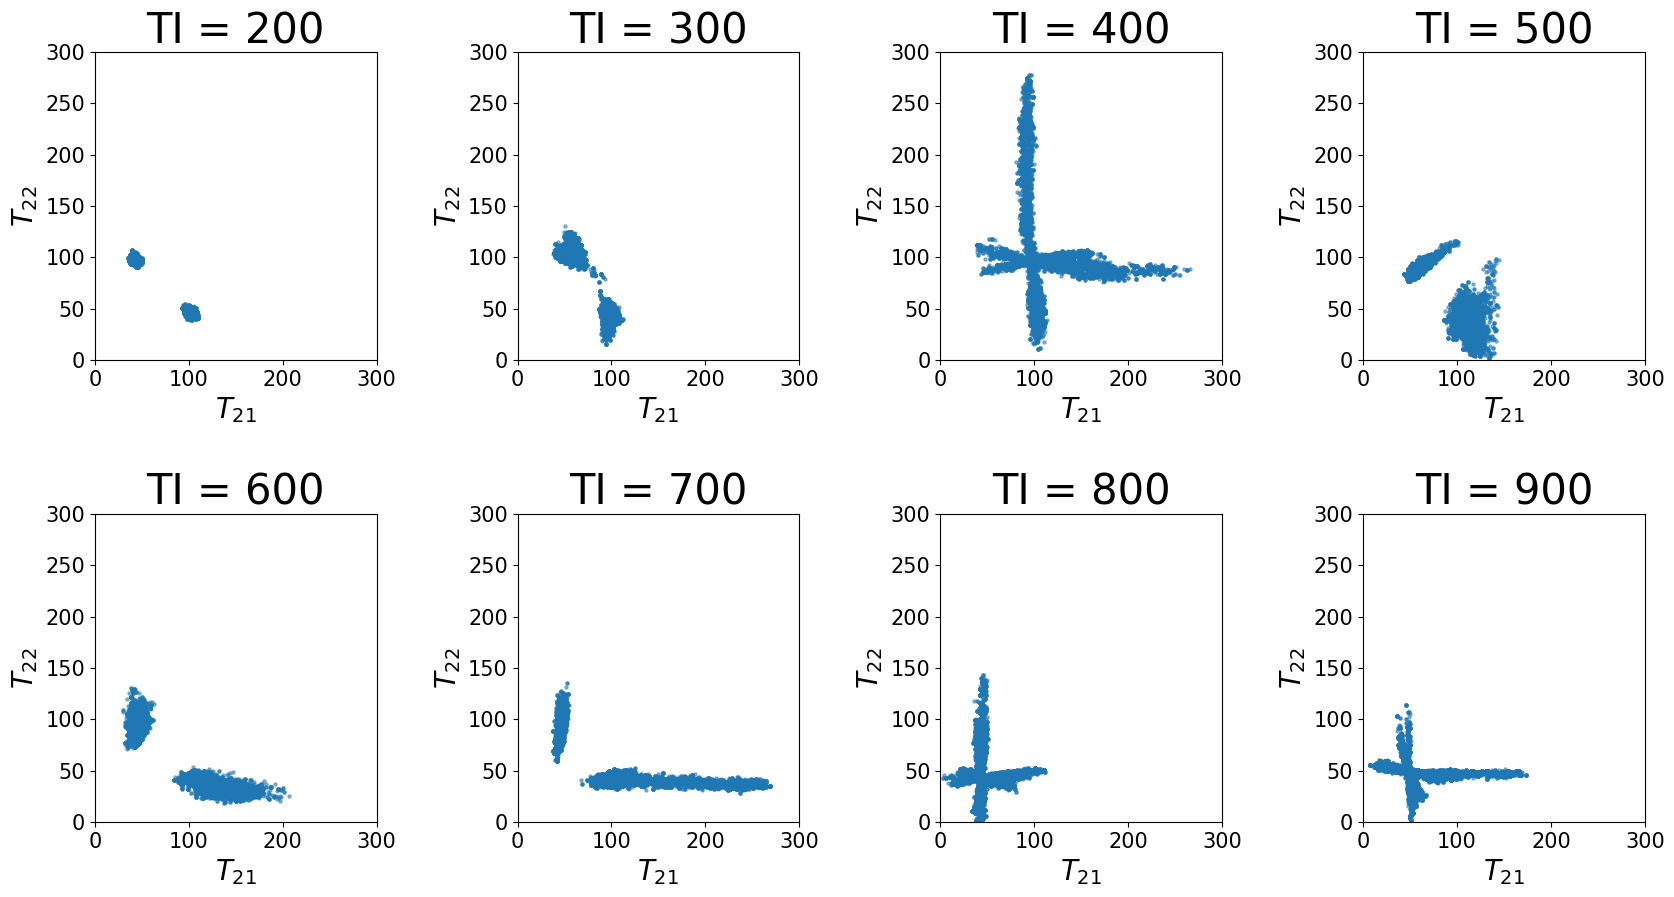

In [12]:
def plot_pointclouds(datas):
    # plot all 8 point clouds in a 2x4 grid
    fig, axs = plt.subplots(2, 4, figsize = (20, 10))
    # increase space between subplots
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    for i in range(8):
        axs[i//4, i%4].scatter(datas[i][:,2], datas[i][:,3], s = 5, alpha = 0.5)
        axs[i//4, i%4].set_title(f"TI = {TIs[i]}", fontsize = 30)
        axs[i//4, i%4].set_xlabel(r"$T_{21}$", fontsize = 20)
        axs[i//4, i%4].set_ylabel(r"$T_{22}$", fontsize = 20)
        axs[i//4, i%4].set_xlim(0, 300)
        axs[i//4, i%4].set_ylim(0, 300)
        # make axis tick labels bigger
        axs[i//4, i%4].tick_params(axis = 'both', which = 'major', labelsize = 15)

    return fig, axs

fig, axs = plot_pointclouds(datas)

In [8]:
# save figure
# fig.savefig("pointclouds_8_bayesian.png")